In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import os
from PIL import Image
print(os.listdir("./common/data"))

import tensorflow as tf

config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))

# Keras Libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

['chest_xray', 'resampled', 'TEST']


Using TensorFlow backend.


# Resample Data Into New Dataset

# Resample Train Data

In [2]:
from common.src import resample as res

In [3]:
from imblearn.over_sampling import ADASYN

path = r'C:\Users\mmitk\dev\2020\pneumonia\common\data\chest_xray\train'
ads = ADASYN(random_state=0)

In [4]:
res.resample_directory(ads, path, 'ADASYN', val = False)

# Load Data

In [5]:
train_folder= './common/data/resampled/ADASYN/train'
val_folder = './common/data/chest_xray/val/'
test_folder = './common/data/chest_xray/test/'

In [6]:
# train 
os.listdir(train_folder)
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'

In [7]:
# test
os.listdir(test_folder)
train_n = test_folder+'NORMAL/'
train_p = test_folder+'PNEUMONIA/'

In [8]:
from common.src import util

train_datagen = util.create_train_datagen()
test_datagen = util.create_test_datagen()

training_set = util.create_generator_set(train_datagen, './common/data/resampled/ADASYN/train')
validation_generator = util.create_generator_set(test_datagen, './common/data/chest_xray/val/')
test_set = util.create_generator_set(test_datagen, './common/data/chest_xray/test/', batch_size = 1, shuffle = False) 

Found 7666 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# Create Model

In [9]:
from common.src import models

cnn = models.CNNModel()
cnn.create_model(do_regularization='L1')
cnn.summary()

# Fit Model

In [10]:
cnn_model = cnn.fit_generator(training_set, validation_generator, epochs=100)

Epoch 1/100
163/163 [==============================] - 12s 74ms/step - loss: 0.9813 - tp: 4115.0000 - fp: 1134.0000 - tn: 4068.0000 - fn: 1087.0000 - accuracy: 0.7865 - precision: 0.7840 - recall: 0.7910 - auc: 0.8834 - val_loss: 0.8202 - val_tp: 209.0000 - val_fp: 95.0000 - val_tn: 209.0000 - val_fn: 95.0000 - val_accuracy: 0.6875 - val_precision: 0.6875 - val_recall: 0.6875 - val_auc: 0.7617
Epoch 2/100
163/163 [==============================] - 10s 61ms/step - loss: 0.4558 - tp: 4662.0000 - fp: 561.0000 - tn: 4655.0000 - fn: 554.0000 - accuracy: 0.8931 - precision: 0.8926 - recall: 0.8938 - auc: 0.9624 - val_loss: 0.9633 - val_tp: 190.0000 - val_fp: 114.0000 - val_tn: 190.0000 - val_fn: 114.0000 - val_accuracy: 0.6250 - val_precision: 0.6250 - val_recall: 0.6250 - val_auc: 0.7148
Epoch 3/100
163/163 [==============================] - 10s 59ms/step - loss: 0.4253 - tp: 4644.0000 - fp: 559.0000 - tn: 4643.0000 - fn: 558.0000 - accuracy: 0.8926 - precision: 0.8926 - recall: 0.8927 - au

Epoch 22/100
163/163 [==============================] - 9s 57ms/step - loss: 0.2984 - tp: 4758.0000 - fp: 447.0000 - tn: 4755.0000 - fn: 444.0000 - accuracy: 0.9144 - precision: 0.9141 - recall: 0.9146 - auc: 0.9752 - val_loss: 0.5800 - val_tp: 209.0000 - val_fp: 95.0000 - val_tn: 209.0000 - val_fn: 95.0000 - val_accuracy: 0.6875 - val_precision: 0.6875 - val_recall: 0.6875 - val_auc: 0.8418
Epoch 23/100
163/163 [==============================] - 9s 57ms/step - loss: 0.3002 - tp: 4795.0000 - fp: 420.0000 - tn: 4796.0000 - fn: 421.0000 - accuracy: 0.9194 - precision: 0.9195 - recall: 0.9193 - auc: 0.9741 - val_loss: 0.6583 - val_tp: 247.0000 - val_fp: 57.0000 - val_tn: 247.0000 - val_fn: 57.0000 - val_accuracy: 0.8125 - val_precision: 0.8125 - val_recall: 0.8125 - val_auc: 0.8008
Epoch 24/100
163/163 [==============================] - 9s 58ms/step - loss: 0.3067 - tp: 4751.0000 - fp: 456.0000 - tn: 4746.0000 - fn: 451.0000 - accuracy: 0.9128 - precision: 0.9124 - recall: 0.9133 - auc: 0

Epoch 43/100
163/163 [==============================] - 10s 58ms/step - loss: 0.2908 - tp: 4752.0000 - fp: 439.0000 - tn: 4749.0000 - fn: 436.0000 - accuracy: 0.9157 - precision: 0.9154 - recall: 0.9160 - auc: 0.9738 - val_loss: 0.7929 - val_tp: 209.0000 - val_fp: 95.0000 - val_tn: 209.0000 - val_fn: 95.0000 - val_accuracy: 0.6875 - val_precision: 0.6875 - val_recall: 0.6875 - val_auc: 0.7227
Epoch 44/100
163/163 [==============================] - 10s 60ms/step - loss: 0.2845 - tp: 4787.0000 - fp: 430.0000 - tn: 4786.0000 - fn: 429.0000 - accuracy: 0.9177 - precision: 0.9176 - recall: 0.9178 - auc: 0.9751 - val_loss: 0.5888 - val_tp: 247.0000 - val_fp: 57.0000 - val_tn: 247.0000 - val_fn: 57.0000 - val_accuracy: 0.8125 - val_precision: 0.8125 - val_recall: 0.8125 - val_auc: 0.8164
Epoch 45/100
163/163 [==============================] - 10s 60ms/step - loss: 0.2772 - tp: 4821.0000 - fp: 399.0000 - tn: 4817.0000 - fn: 395.0000 - accuracy: 0.9239 - precision: 0.9236 - recall: 0.9243 - auc

Epoch 64/100
163/163 [==============================] - 10s 59ms/step - loss: 0.2579 - tp: 4826.0000 - fp: 389.0000 - tn: 4827.0000 - fn: 390.0000 - accuracy: 0.9253 - precision: 0.9254 - recall: 0.9252 - auc: 0.9798 - val_loss: 0.5307 - val_tp: 209.0000 - val_fp: 95.0000 - val_tn: 209.0000 - val_fn: 95.0000 - val_accuracy: 0.6875 - val_precision: 0.6875 - val_recall: 0.6875 - val_auc: 0.8633
Epoch 65/100
163/163 [==============================] - 10s 59ms/step - loss: 0.2776 - tp: 4777.0000 - fp: 424.0000 - tn: 4778.0000 - fn: 425.0000 - accuracy: 0.9184 - precision: 0.9185 - recall: 0.9183 - auc: 0.9765 - val_loss: 0.5477 - val_tp: 209.0000 - val_fp: 95.0000 - val_tn: 209.0000 - val_fn: 95.0000 - val_accuracy: 0.6875 - val_precision: 0.6875 - val_recall: 0.6875 - val_auc: 0.8477
Epoch 66/100
163/163 [==============================] - 9s 58ms/step - loss: 0.2922 - tp: 4742.0000 - fp: 456.0000 - tn: 4746.0000 - fn: 460.0000 - accuracy: 0.9120 - precision: 0.9123 - recall: 0.9116 - auc:

Epoch 85/100
163/163 [==============================] - 10s 58ms/step - loss: 0.2605 - tp: 4811.0000 - fp: 404.0000 - tn: 4812.0000 - fn: 405.0000 - accuracy: 0.9225 - precision: 0.9225 - recall: 0.9224 - auc: 0.9785 - val_loss: 0.4537 - val_tp: 228.0000 - val_fp: 76.0000 - val_tn: 228.0000 - val_fn: 76.0000 - val_accuracy: 0.7500 - val_precision: 0.7500 - val_recall: 0.7500 - val_auc: 0.8984
Epoch 86/100
163/163 [==============================] - 10s 59ms/step - loss: 0.2672 - tp: 4778.0000 - fp: 410.0000 - tn: 4778.0000 - fn: 410.0000 - accuracy: 0.9210 - precision: 0.9210 - recall: 0.9210 - auc: 0.9775 - val_loss: 0.5129 - val_tp: 209.0000 - val_fp: 95.0000 - val_tn: 209.0000 - val_fn: 95.0000 - val_accuracy: 0.6875 - val_precision: 0.6875 - val_recall: 0.6875 - val_auc: 0.8672
Epoch 87/100
163/163 [==============================] - 10s 64ms/step - loss: 0.2568 - tp: 4828.0000 - fp: 375.0000 - tn: 4827.0000 - fn: 374.0000 - accuracy: 0.9280 - precision: 0.9279 - recall: 0.9281 - auc

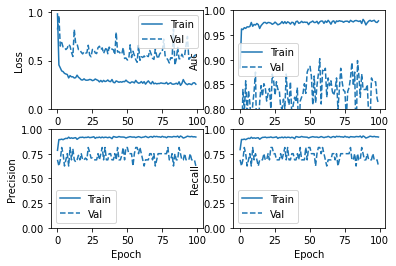

In [11]:
cnn.plot_history()

In [12]:
cnn.get_classification_report(test_set)

              precision    recall  f1-score   support

      NORMAL       0.81      0.85      0.83       234
   PNEUMONIA       0.91      0.88      0.89       390

    accuracy                           0.87       624
   macro avg       0.86      0.86      0.86       624
weighted avg       0.87      0.87      0.87       624



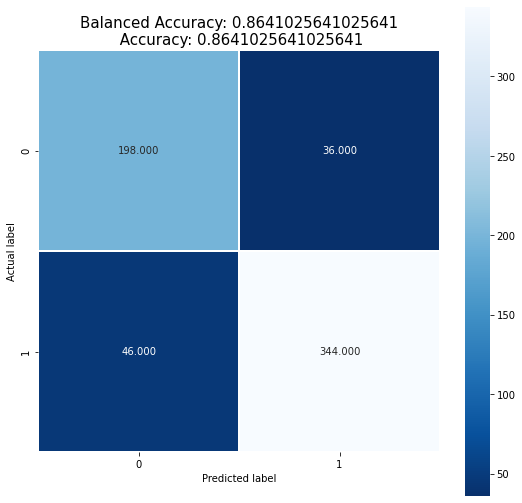

In [13]:
cnn.display_confusion_matrix(test_set)